# QC P. Syringae RNAseq Data

## Part of Modulome Project

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#QC-Thresholds" data-toc-modified-id="QC-Thresholds-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>QC Thresholds</a></span></li><li><span><a href="#Inputs" data-toc-modified-id="Inputs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Inputs</a></span></li><li><span><a href="#Load-expression-data" data-toc-modified-id="Load-expression-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load expression data</a></span></li><li><span><a href="#Load-QC-data" data-toc-modified-id="Load-QC-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Load QC data</a></span></li><li><span><a href="#Load-metadata" data-toc-modified-id="Load-metadata-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Load metadata</a></span></li><li><span><a href="#Remove-extra-sample-rows" data-toc-modified-id="Remove-extra-sample-rows-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Remove extra sample rows</a></span></li></ul></li><li><span><a href="#Check-statistics" data-toc-modified-id="Check-statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check statistics</a></span><ul class="toc-item"><li><span><a href="#FastQC-stats" data-toc-modified-id="FastQC-stats-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>FastQC stats</a></span></li><li><span><a href="#Percent-of-reads-aligned-to-genome" data-toc-modified-id="Percent-of-reads-aligned-to-genome-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Percent of reads aligned to genome</a></span></li><li><span><a href="#Number-of-aligned-reads" data-toc-modified-id="Number-of-aligned-reads-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Number of aligned reads</a></span></li></ul></li><li><span><a href="#Examine-Global-Correlations" data-toc-modified-id="Examine-Global-Correlations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examine Global Correlations</a></span><ul class="toc-item"><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Hierarchical Clustering</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Metadata-Curation" data-toc-modified-id="Metadata-Curation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metadata Curation</a></span><ul class="toc-item"><li><span><a href="#BioProject-counts-of-passing-metadata" data-toc-modified-id="BioProject-counts-of-passing-metadata-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>BioProject counts of passing metadata</a></span></li><li><span><a href="#BioProject-counts-of-all-metadata" data-toc-modified-id="BioProject-counts-of-all-metadata-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>BioProject counts of all metadata</a></span></li></ul></li><li><span><a href="#Correlations-between-replicates" data-toc-modified-id="Correlations-between-replicates-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Correlations between replicates</a></span><ul class="toc-item"><li><span><a href="#Compute-Pearson-R-Score" data-toc-modified-id="Compute-Pearson-R-Score-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Compute Pearson R Score</a></span></li><li><span><a href="#Drop-Samples-with-no-replicates" data-toc-modified-id="Drop-Samples-with-no-replicates-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Drop Samples with no replicates</a></span></li></ul></li><li><span><a href="#Remove-failed-samples" data-toc-modified-id="Remove-failed-samples-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Remove failed samples</a></span></li><li><span><a href="#Save-final-datasets" data-toc-modified-id="Save-final-datasets-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Save final datasets</a></span></li></ul></div>

In [1]:
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('ticks')

# Setup

## QC Thresholds

In [3]:
min_pct_aligned = 40 # Minimum percent of reads aligned to genome
min_mrna_reads = 5e5 # Minimum number of reads mapped to mRNA

## Data Directory

In [4]:
DATA_DIR = path.join('../data')
os.listdir(DATA_DIR)

['multiqc_report.html',
 'metadata_uncurated.tsv',
 'metadata.tsv',
 'counts.csv',
 'log_tpm.csv',
 'multiqc_stats.tsv']

## Load expression data

In [5]:
DF_log_tpm = pd.read_csv(path.join(DATA_DIR,'log_tpm.csv'),index_col=0).fillna(0)
#DF_log_tpm = pd.read_csv('log_tpm.csv',index_col=0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])

Number of genes: 5906
Number of samples: 265


In [6]:
DF_log_tpm.fillna(0,inplace=True)
DF_log_tpm.head()

,ERX1050026,ERX1050027,ERX1050028,ERX1050029,SRX1828913,SRX1828914,SRX1828915,SRX1828916,SRX1828917,SRX1828918,...,SRX6997964,SRX6997965,SRX6997966,SRX6997967,SRX6997968,SRX6997969,SRX6997970,SRX6997971,SRX6997972,SRX6997973
Geneid,,,,,,,,,,,,,,,,,,,,,
PSPTO_RS00005,7.900133,7.987956,7.734745,7.813235,7.585605,7.584267,7.329633,7.152433,7.510806,7.735302,...,9.138747,9.010005,8.590782,8.823284,8.899413,9.137152,8.116234,8.945595,8.678108,9.221349
PSPTO_RS00010,7.638266,8.017748,8.224185,8.036464,7.264895,7.041895,7.130760,6.782228,7.195436,6.806941,...,7.896971,7.978185,7.114564,7.112753,7.526147,8.178768,6.978795,7.476978,6.783285,8.318589
PSPTO_RS00015,6.398371,6.633463,6.740104,6.852876,7.011886,7.320224,7.160459,7.354857,7.024243,7.252687,...,7.596375,7.748529,7.604587,7.624731,7.891397,7.922258,7.833473,7.424360,7.118320,7.735049
PSPTO_RS00020,7.713105,8.458844,7.927300,8.500740,9.349298,8.719932,9.087367,8.298056,9.384280,8.804059,...,8.494881,8.358490,8.697367,8.465721,8.578360,8.555779,8.624170,8.374625,8.403117,8.527940
PSPTO_RS00025,7.468934,7.099794,6.402653,6.859215,7.485567,7.442691,7.246688,7.500334,7.420076,7.549975,...,5.359932,4.928904,4.939280,5.146998,4.899347,5.384409,5.604068,4.833956,5.723919,5.219768


## Load QC data
<font size="4">There may be some datasets that failed along the processing pipeline, so the number of samples with QC data may be higher than the number of samples with expression data.</font>

In [7]:
DF_qc_stats = pd.read_csv(path.join(DATA_DIR,'multiqc_stats.tsv'),index_col=0, sep='\t')
print('Number of samples with QC data:',DF_qc_stats.shape[0])

Number of samples with QC data: 265


In [8]:
DF_qc_stats.fillna(0,inplace=True)
DF_qc_stats.head()

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
Sample,,,,,,,,,,,,,,,,,,,,,
ERX1050026,12906882,1808968,3345960,1051113,0,0,0,0,3363,0,...,13069762,1320045962,72686059,1241776137,5.929326,0.4413,0.1390,0.4197,0.0000,0.0000
ERX1050027,12903505,1929443,3285599,844982,0,0,0,0,4050,0,...,13097763,1322874063,77398923,1240050828,6.260856,0.4448,0.1518,0.4034,0.0000,0.0000
ERX1050028,15102236,7738394,67572,2071735,0,0,0,0,6605,0,...,15293443,1544637743,64751255,1473531128,4.603449,0.3186,0.2902,0.3912,0.0000,0.0000
ERX1050029,13307676,4987996,1868947,3989453,0,0,0,0,10111,0,...,13485785,1362064285,35111071,1320614420,3.043165,0.3714,0.2454,0.3832,0.0000,0.0000
SRX1828913,18238610,11482384,65272,2227695,0,0,0,0,0,0,...,18528447,1871373147,36582772,1800306321,3.797576,0.0000,0.0000,0.3728,0.5704,0.0569


## Load metadata

In [9]:
DF_metadata = pd.read_csv(path.join(DATA_DIR,'metadata.tsv'),index_col=0,sep='\t')
print('Number of samples with metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with metadata: 268


,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,growth_phase,OD,co_culture,time,host_plant,host_genotype,infiltration_agent,inoculation_time (h post infiltration),sample_time (h post inoculation),additional_notes
Experiment,,,,,,,,,,,,,,,,,,,,,
ERX1050026,1/1/16 5:25,223283,Pseudomonas syringae pv. tomato str. DC3000,251701,1236,223283,Pseudomonas syringae group genomosp. 3,PAIRED,ILLUMINA,Illumina HiSeq 2000,...,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERX1050027,1/1/16 5:25,223283,Pseudomonas syringae pv. tomato str. DC3000,251701,1236,223283,Pseudomonas syringae group genomosp. 3,PAIRED,ILLUMINA,Illumina HiSeq 2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERX1050028,1/1/16 5:25,223283,Pseudomonas syringae pv. tomato str. DC3000,251701,1236,223283,Pseudomonas syringae group genomosp. 3,PAIRED,ILLUMINA,Illumina HiSeq 2000,...,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERX1050029,1/1/16 5:25,223283,Pseudomonas syringae pv. tomato str. DC3000,251701,1236,223283,Pseudomonas syringae group genomosp. 3,PAIRED,ILLUMINA,Illumina HiSeq 2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERX2322625,1/24/19 9:37,323,Pseudomonas syringae pv. tomato,251701,1236,323,Pseudomonas syringae group genomosp. 3,PAIRED,ILLUMINA,Illumina HiSeq 2000,...,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Remove extra sample rows

In [10]:
# Ensure that metadata and qc_stats data contain all log_tpm sample information
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())
assert(set(DF_log_tpm.columns) - set(DF_qc_stats.index) == set())

In [11]:
DF_metadata = DF_metadata.loc[DF_log_tpm.columns]
DF_qc_stats = DF_qc_stats.loc[DF_log_tpm.columns]

# Check statistics

<font size="4">From here, create a new spreadsheet where you can flag samples based on various QC statistics</font>


## FastQC stats

In [12]:
fastqc_cols = ['per_base_sequence_quality',
       'per_tile_sequence_quality', 'per_sequence_quality_scores',
       'per_base_sequence_content', 'per_sequence_gc_content',
       'per_base_n_content', 'sequence_length_distribution',
       'sequence_duplication_levels', 'overrepresented_sequences',
       'adapter_content']

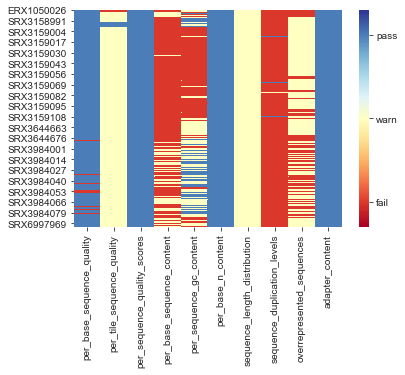

In [13]:
DF_fastqc = DF_qc_stats[fastqc_cols]
ax = sns.heatmap(DF_fastqc.replace('pass',1).replace('warn',0).replace('fail',-1),
            cmap='RdYlBu',vmax=1.3,vmin=-1.3)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['fail','warn','pass'])

<font size="4">The following four categories are the most important:
    - per_base_sequence_quality
    - per_sequence_quality_scores
    - per_base_n_content
    - adapter_content
    
If a sample does not pass any of these four categories, discard the sample
</font>

In [14]:
fastqc_fail_cols = ['per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','adapter_content']

In [15]:
DF_failed_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] != 'pass').any(axis=1)]
DF_failed_fastqc[fastqc_fail_cols]

,per_base_sequence_quality,per_sequence_quality_scores,per_base_n_content,adapter_content
SRX3983991,fail,pass,pass,pass
SRX3983992,fail,pass,pass,pass
SRX3984030,fail,pass,pass,pass
SRX3984033,fail,pass,pass,pass
SRX3984044,fail,pass,pass,pass
SRX3984053,fail,pass,pass,pass
SRX3984054,fail,pass,pass,pass
SRX3984055,fail,pass,pass,pass
SRX3984072,fail,pass,pass,pass
SRX3984075,fail,pass,pass,pass


<font size="4">Mark samples as failed.</font>

In [16]:
DF_metadata['passed_fastqc'] = ~DF_metadata.index.isin(DF_failed_fastqc.index)

## Percent of reads aligned to genome

In [17]:
min_pct_aligned

40

Text(0.5, 1.0, 'Histogram of Alignment Percentage')

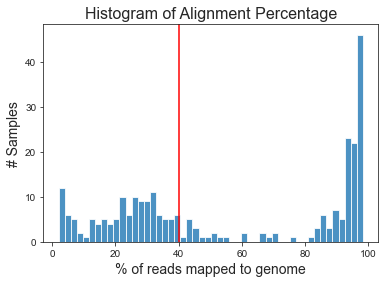

In [18]:
fig,ax = plt.subplots()
ax.hist(DF_qc_stats['reads_aligned_percentage'],bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_pct_aligned,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('% of reads mapped to genome',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Histogram of Alignment Percentage',fontsize=16)

#### P. syringae CUSTOM: only exclude samples with low alignment that were monocultured

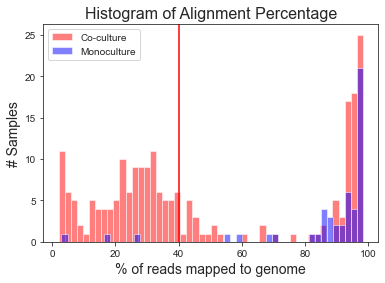

In [19]:
non_mono_idx = DF_metadata[(~DF_metadata['co_culture'].isna()) | (~DF_metadata['host_plant'].isna())].index
mono_idx = DF_metadata[(DF_metadata['co_culture'].isna()) & (DF_metadata['host_plant'].isna())].index

fig,ax = plt.subplots()
ax.hist(DF_qc_stats.loc[non_mono_idx]['reads_aligned_percentage'],bins=50,alpha=0.5,color='r', label='Co-culture')
ax.hist(DF_qc_stats.loc[mono_idx]['reads_aligned_percentage'],bins=50,alpha=0.5,color='b', label='Monoculture')
ymin,ymax = ax.get_ylim()
ax.vlines(min_pct_aligned,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('% of reads mapped to genome',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Histogram of Alignment Percentage',fontsize=16)
ax.legend()

In [20]:
DF_failed_mapping = DF_qc_stats.loc[mono_idx][DF_qc_stats['reads_aligned_percentage'] < min_pct_aligned]
DF_failed_mapping

/Users/cam/.virtualenvs/modulome/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
SRX3159104,2606065,330373,547,2172423,0,0,0,0,0,0,...,2606116,366474689,486118,364061008,0.658621,0.0,0.0,0.3782,0.5773,0.0445
SRX3159105,4587942,100797,783,4454423,0,0,0,0,0,0,...,4588069,647880764,946323,643817065,0.627229,0.0,0.0,0.3842,0.5734,0.0424
SRX3159108,3906799,665474,61773,2878255,0,0,0,0,0,0,...,3906887,562040435,1985124,556895156,0.915464,0.0,0.0,0.3854,0.5488,0.0658


In [21]:
DF_metadata['passed_pct_reads_mapped'] = ~DF_metadata.index.isin(DF_failed_mapping.index)

## Number of aligned reads

<font size="4">The following histogram shows how many reads map to coding sequences (i.e. mRNA). Too few aligned reads reduces the sensitivity of the resulting data.</font>

In [22]:
min_mrna_reads

500000.0

Text(0.5, 1.0, 'Number of reads mapped to CDS')

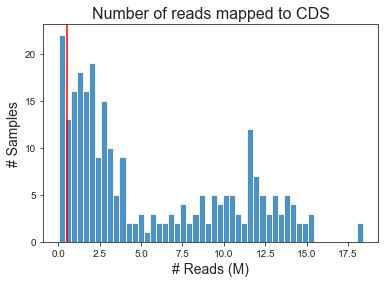

In [23]:
fig,ax = plt.subplots()
ax.hist(DF_qc_stats['Assigned']/1e6,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_mrna_reads/1e6,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('# Reads (M)',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Number of reads mapped to CDS',fontsize=16)

<font size="4">Identify samples with poor read depth:</font>

In [24]:
DF_failed_mrna = DF_qc_stats[DF_qc_stats['Assigned'] < min_mrna_reads].sort_values('Assigned')
DF_failed_mrna

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
SRX3159067,78037,16302,10,58032,0,0,0,0,0,0,...,78039,11081046,16389,11007953,0.659622,0.0,0.0,0.3721,0.5900,0.0379
SRX3159105,4587942,100797,783,4454423,0,0,0,0,0,0,...,4588069,647880764,946323,643817065,0.627229,0.0,0.0,0.3842,0.5734,0.0424
SRX3158997,35794761,137095,352779,35084618,0,0,0,0,0,0,...,35865522,1793276100,5790689,1769316425,1.336084,0.0,0.0,0.3277,0.5674,0.1049
SRX6997970,7668838,141451,361,7471879,0,0,0,0,0,0,...,7669644,1074124730,2821049,1059128788,1.396108,0.0,0.0,0.3940,0.5183,0.0877
SRX3159064,5990736,152236,300,5799998,0,0,0,0,0,0,...,5990943,856466041,1604921,850461442,0.701090,0.0,0.0,0.3995,0.5596,0.0410
SRX3159078,5289175,152550,99,5077748,0,0,0,0,0,0,...,5289343,765634875,1558707,760853778,0.624462,0.0,0.0,0.4209,0.5325,0.0465
SRX3159068,6935165,178207,272,6712051,0,0,0,0,0,0,...,6935375,998692504,1701201,992029743,0.667148,0.0,0.0,0.3939,0.5661,0.0401
SRX3158998,36968339,201155,492395,36020451,0,0,0,0,0,0,...,37052072,1852603600,6064950,1827273216,1.367286,0.0,0.0,0.2955,0.6275,0.0771
SRX3158999,36648022,202742,462423,35709709,0,0,0,0,0,0,...,36730300,1836515000,6159875,1811328929,1.371406,0.0,0.0,0.2836,0.6320,0.0844
SRX3159081,3909704,204938,226,3624743,0,0,0,0,0,0,...,3909841,561971437,1133751,558284954,0.655991,0.0,0.0,0.4341,0.5180,0.0480


<font size="4">Mark samples as failed.</font>

In [25]:
DF_metadata['passed_reads_mapped_to_CDS'] = ~DF_metadata.index.isin(DF_failed_mrna.index)

# Examine Global Correlations

## Hierarchical Clustering

<font size=4> A clustermap is a great way to visualize the global correlations between one sample and all others. The following code uses hierarchical clustering to identify specific clusters in the clustermap <font size=4>
    
<font size=4> To increase the number of clusters, decrease the value of `thresh`. To decrease the number of clusters, increase the value of `thresh` <font size=4>

In [26]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches
# change this to get different number of clusters
thresh = .4

# retrieve clusters using fcluster 
corr = DF_log_tpm.corr()
corr.fillna(0,inplace=True)
dist = sch.distance.pdist(corr)
link = sch.linkage(dist, method='complete')
clst = pd.DataFrame(index=DF_log_tpm.columns)
clst['cluster'] = sch.fcluster(link, thresh * dist.max(), 'distance')

#get colors for each cluster
cm = plt.cm.get_cmap('tab20')
clr = dict(zip(clst.cluster.unique(), cm.colors))
clst['color'] = clst.cluster.map(clr)

print('Number of cluster: ', len(clr))

Number of cluster:  7


<font size="4">To view sample IDs in the clustermap, set `xticklabels` and `yticklabels` to `True`. You can increase the `size` variable to improve readability of sample IDs<font>

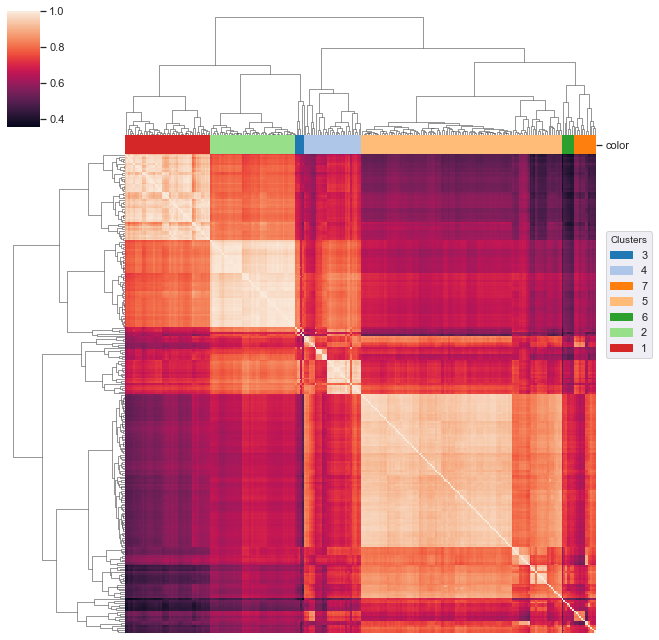

In [27]:
size = 9

legend_TN = [patches.Patch(color=c, label=l) for l,c in clr.items()]

sns.set(rc={'figure.facecolor':'white'})
g = sns.clustermap(DF_log_tpm.corr(), figsize=(size,size), 
                   row_linkage=link, col_linkage=link, col_colors=clst.color,
                  yticklabels=False, xticklabels=False)

l2=g.ax_heatmap.legend(loc='upper left', bbox_to_anchor=(1.01,0.85), handles=legend_TN,frameon=True)
l2.set_title(title='Clusters',prop={'size':10})

<font size="4">Select clusters to remove.</font>

Not removing specific clusters, but the first two columns and the columns at the left end of the light blue cluster look uncorrelated; these are all from the same project that I was already suspicious about; removing these

In [28]:
project_to_remove = 'PRJEB10027'
failed_global_corr = DF_metadata[DF_metadata['BioProject'] == project_to_remove].index

In [29]:
DF_metadata['passed_global_correlation'] = ~DF_metadata.index.isin(failed_global_corr)

In [30]:
DF_metadata.head()

,ReleaseDate,TaxID,ScientificName,species_tax_id,class_tax_id,strain_tax_id,species,LibraryLayout,Platform,Model,...,host_plant,host_genotype,infiltration_agent,inoculation_time (h post infiltration),sample_time (h post inoculation),additional_notes,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation
ERX1050026,1/1/16 5:25,223283,Pseudomonas syringae pv. tomato str. DC3000,251701,1236,223283,Pseudomonas syringae group genomosp. 3,PAIRED,ILLUMINA,Illumina HiSeq 2000,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,False
ERX1050027,1/1/16 5:25,223283,Pseudomonas syringae pv. tomato str. DC3000,251701,1236,223283,Pseudomonas syringae group genomosp. 3,PAIRED,ILLUMINA,Illumina HiSeq 2000,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,False
ERX1050028,1/1/16 5:25,223283,Pseudomonas syringae pv. tomato str. DC3000,251701,1236,223283,Pseudomonas syringae group genomosp. 3,PAIRED,ILLUMINA,Illumina HiSeq 2000,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,False
ERX1050029,1/1/16 5:25,223283,Pseudomonas syringae pv. tomato str. DC3000,251701,1236,223283,Pseudomonas syringae group genomosp. 3,PAIRED,ILLUMINA,Illumina HiSeq 2000,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,False
SRX1828913,6/12/16 16:20,223283,Pseudomonas syringae pv. tomato str. DC3000,251701,1236,223283,Pseudomonas syringae group genomosp. 3,SINGLE,ILLUMINA,Illumina HiSeq 2000,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True


# Remove failed samples

In [31]:
qc_columns = ['passed_fastqc',
              'passed_reads_mapped_to_CDS',
              'passed_pct_reads_mapped',
              'passed_global_correlation']

In [32]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]

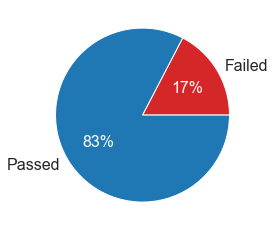

In [33]:
_,_,pcts = plt.pie(pass_qc.value_counts().sort_values(),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

# Metadata Curation

<font size=4>The following sections can only be run after metadata curation is complete. To enable metadata curation, the code in this section sorts data by BioProject. </font>

## BioProject counts of passing metadata

In [34]:
DF_metadata_passed.BioProject.value_counts().sort_values(ascending=False)

PRJNA401856    93
PRJNA432750    21
PRJNA577705     9
PRJNA324711     6
PRJNA401802     6
               ..
PRJNA439588     1
PRJNA439660     1
PRJNA439611     1
PRJNA439654     1
PRJNA439659     1
Name: BioProject, Length: 89, dtype: int64

## BioProject counts of all metadata

In [35]:
DF_metadata.BioProject.value_counts().sort_values(ascending=False)

PRJNA401856    114
PRJNA432750     21
PRJNA577705     12
PRJNA401802     12
PRJNA324711      6
              ... 
PRJNA439606      1
PRJNA439608      1
PRJNA439611      1
PRJNA439630      1
PRJNA439659      1
Name: BioProject, Length: 102, dtype: int64

# Correlations between replicates

<font size=4> First, get a full sample name </font>

In [36]:
# Turn off pesky warning
pd.set_option('mode.chained_assignment', None)

In [37]:
DF_metadata_passed['full_name'] = DF_metadata_passed.loc[:,'project_name'].str.cat(DF_metadata_passed.loc[:,'condition_name'],sep=':')

## Compute Pearson R Score

<font size="4">Once you have updated your metadata files with the sample information, we can investigate correlations between biological replicates. We require biological replicates to have a Pearson R correlation above 0.95. </font>

In [38]:
from tqdm.notebook import tqdm
import itertools
from scipy import stats

In [39]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed)*(len(DF_metadata_passed)-1)/2
for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed.index,2),total=num_comparisons):
    if DF_metadata_passed.loc[exp1,'full_name'] == DF_metadata_passed.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

In [40]:
sns.set_style('ticks')

Median Pearson R between replicates: 0.95


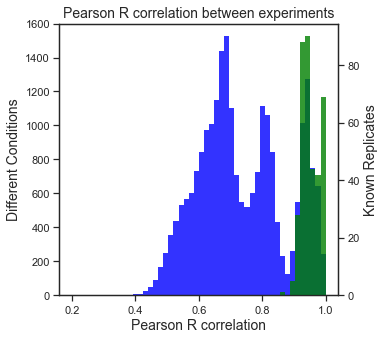

In [41]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

#### For P Syringae, be more lenient with the co-culture samples; use 0.9 for these, but 0.95 for monoculture

In [42]:
dissimilar_co = []
print('Most dissimilar co-culture replicates:')
for x in [(k,v) for k,v in rep_corrs.items() if v < 0.9 and k[0] in non_mono_idx]:
    print(x)
    dissimilar_co.append(x[0][0])
    dissimilar_co.append(x[0][1])
dissimilar_co = set(dissimilar_co)

Most dissimilar co-culture replicates:
(('SRX3984018', 'SRX3984083'), 0.8708524764813008)
(('SRX3984060', 'SRX3984083'), 0.8898532950476633)


In [43]:
dissimilar_mono = []
print('Most dissimilar replicates:')
for x in [(k,v) for k,v in rep_corrs.items() if v < 0.95 and k[0] in mono_idx]:
    print(x)
    dissimilar_mono.append(x[0][0])
    dissimilar_mono.append(x[0][1])
dissimilar_mono = set(dissimilar_mono)

Most dissimilar replicates:
(('SRX3159106', 'SRX3159109'), 0.9163548775317807)
(('SRX3159107', 'SRX3159110'), 0.8970990857516038)
(('SRX3159107', 'SRX3159113'), 0.8911310264440501)
(('SRX3644674', 'SRX3644675'), 0.8980268840698766)
(('SRX3644674', 'SRX3644676'), 0.9199910156174625)


In [44]:
dissimilar = dissimilar_co.union(dissimilar_mono)
DF_metadata_passed['passed_similar_replicates'] = ~DF_metadata_passed.index.isin(dissimilar)

## Drop Samples with no replicates

In [45]:
cond_counts = DF_metadata_passed.condition_name.value_counts()
drop_conds = cond_counts[cond_counts < 2].index
drop_conds

Index(['AvrRps4_WT', 'AvrRpt2_KB', 'WT_KB', 'D36E_WT', 'WT_b2b3',
       'AvrRpt2_SP'],
      dtype='object')

In [46]:
DF_metadata_passed['passed_number_replicates'] = ~DF_metadata_passed.condition_name.isin(drop_conds)

In [47]:
DF_metadata_passed = DF_metadata_passed[DF_metadata_passed['passed_number_replicates']]

# Remove failed samples

In [48]:
qc_columns = ['passed_number_replicates','passed_similar_replicates']

In [49]:
DF_metadata_final = DF_metadata_passed[DF_metadata_passed[qc_columns].all(axis=1)]

In [50]:
DF_metadata_final.shape

(202, 59)

In [51]:
DF_log_tpm_final = DF_log_tpm[DF_metadata_final.index]

# Save final datasets

In [52]:
DF_log_tpm_final.to_csv(os.path.join(DATA_DIR,'log_tpm_qc.csv'))
DF_metadata_final.to_csv(os.path.join(DATA_DIR,'metadata_qc.csv'))